knn

In [125]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib as plt
from scipy.optimize import curve_fit
from matplotlib import pyplot

from sklearn import model_selection, preprocessing, neighbors,svm
from sklearn.metrics import r2_score

In [126]:
df = pd.read_csv("breast-cancer-wisconsin.csv",header=None)
df.replace('?',-99999,inplace=True)
df.set_axis(['id', 'uniform_cell_size ', 'clump_thickness ', 'marginal_adhesion', 'uniform_cell_shape',
'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],axis=1,inplace=True)
df.drop(['id'],1,inplace=True)
df.head()

<ipython-input-126-aa57bfcc028a>:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['id', 'uniform_cell_size ', 'clump_thickness ', 'marginal_adhesion', 'uniform_cell_shape',
<ipython-input-126-aa57bfcc028a>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'],1,inplace=True)


,uniform_cell_size,clump_thickness,marginal_adhesion,uniform_cell_shape,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1,5,1,1,2,1,3,1,1,2
1,4,5,5,4,7,10,3,2,1,2
2,1,3,1,1,2,2,3,1,1,2
3,8,6,1,8,3,4,3,7,1,2
4,1,4,3,1,2,1,3,1,1,2


In [127]:
x = np.array(df.drop(['class'],1))
y = np.array(df['class'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)

<ipython-input-127-ce03b18494b1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['class'],1))


best k 3
0.9714285714285714


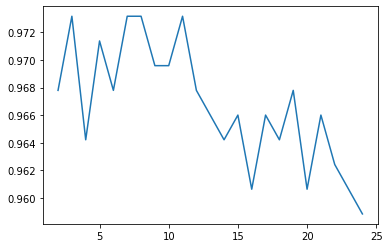

In [128]:
a=[]
for i in range (2,25):

    clf = neighbors.KNeighborsClassifier(i) 
    clf.fit(x_train, y_train)
    a.append( clf.score(x_train, y_train))

print("best k",a.index(max(a))+2)

pyplot.plot(range(2,25),np.array(a))

clf = neighbors.KNeighborsClassifier(a.index(max(a))) 
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print(accuracy)

In [129]:
prediction = clf.predict(x_test)
print(prediction)
#2=>  benign 4=>malignant
z=[]
for i in range (len(x_test)):
    x_test[i]
    if clf.predict([x_test[i]])==y_test[i]:
        z.append(1)
    else:
        z.append(0)
print(z)

[2 4 2 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 4 2 2 4 2 4 4 2 2 2 4 2 2 2
 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 2 4 4 2 2
 2 2 2 2 2 2 4 2 4 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 4 2 2 2
 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


svm

In [130]:
clf = svm.SVC()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.7357142857142858
